## Case 2 - Using all input parameters

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [135]:
# Load the dataset and do preprocessing
data = pd.read_excel("../input_data/dataset.xlsx")
columns_to_keep = ["jointtype", "Vf", "AR", "RI", "fc", "sigcc", "bar", "hzerominusa", "hj","car", "jar", "bj", "n", "A0", "s", "fy", "rogross", "α", "ϐ","γ" ]
X = data[columns_to_keep]
X.loc[:, 'jointtype'] = X['jointtype'].map({'Exterior': 0, 'Interior': 1})
X.columns = X.iloc[0,:].values
X = X.tail(-1)
y = data[['vj']]
y.columns = y.iloc[0,:].values
y = y.tail(-1)
y = y.values.ravel()

# Separate the last 26 examples for testing
test_size = 26
X_train_val = X.iloc[:-test_size]
y_train_val = y[:-test_size]
X_test = X.iloc[-test_size:]
y_test = y[-test_size:]

/var/folders/l8/g6h_zwl954398ws8v_t5h83w0000gn/T/ipykernel_22606/2121374537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'jointtype'] = X['jointtype'].map({'Exterior': 0, 'Interior': 1})


In [136]:
# Initialize variables
num_trees = range(10, 201, 10)  # Number of trees to evaluate
rmse_scores = []  # To store RMSE scores
r2_scores = []  # To store R^2 scores
feature_importances = []  # To store feature importance for each model

# Set up K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the number of trees
for n in num_trees:
    # Initialize the RandomForestRegressor with n trees
    random_forest = RandomForestRegressor(n_estimators=n, random_state=42)
    
    # Perform cross-validation and compute RMSE and R^2
    rmse_cv_scores = cross_val_score(random_forest, X_train_val, y_train_val, cv=kfold, scoring='neg_mean_squared_error')
    r2_cv_scores = cross_val_score(random_forest, X_train_val, y_train_val, cv=kfold, scoring='r2')
    
    # Convert RMSE scores from negative MSE
    rmse = np.sqrt(-rmse_cv_scores.mean())
    r2 = r2_cv_scores.mean()  # R^2 is directly averaged
    # Append scores
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    # Train the model on the entire training set to extract feature importances
    random_forest.fit(X_train_val, y_train_val)
    feature_importances.append(random_forest.feature_importances_)

/Users/nguyenvo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/nguyenvo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/nguyenvo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/nguyenvo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  war

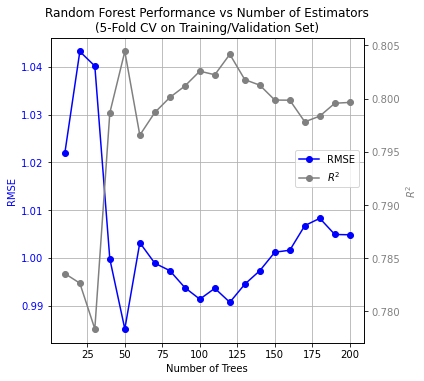

Optimal number of trees based on RMSE: 50
Optimal number of trees based on R^2: 50


In [137]:
# Create a figure and axis for the shared x-axis
fig, ax1 = plt.subplots(figsize=(6, 6))  # Square figure

# Plot RMSE on the left y-axis
ax1.plot(num_trees, rmse_scores, marker='o', linestyle='-', label='RMSE', color='blue')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add the second y-axis for R^2
ax2 = ax1.twinx()
ax2.plot(num_trees, r2_scores, marker='o', linestyle='-', label='$R^2$', color='gray')  # Changed label for a cleaner look
ax2.set_ylabel('$R^2$', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Add a grid for the shared x-axis
ax1.grid()

# Add legends for both metrics with improved formatting
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='center right', bbox_to_anchor=(0.85, 0.6))

# Update title to be more descriptive
ax1.set_title('Random Forest Performance vs Number of Estimators\n(5-Fold CV on Training/Validation Set)')

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space at the bottom for the legend
plt.savefig('../random_forest_results/rf_performance_metrics_case2.png', dpi=1000, bbox_inches='tight')
plt.show()

# Find the optimal number of trees based on RMSE and R^2
optimal_trees_rmse = num_trees[np.argmin(rmse_scores)]
optimal_trees_r2 = num_trees[np.argmax(r2_scores)]
print(f"Optimal number of trees based on RMSE: {optimal_trees_rmse}")
print(f"Optimal number of trees based on R^2: {optimal_trees_r2}")

Features ranked by importance:
σcc: 0.3434
fc: 0.3018
Joint AR: 0.0555
n: 0.0393
α: 0.0313
Rl: 0.0283
Beam AR: 0.0276
β: 0.0216
Joint Dm mm & mm2_bj: 0.0192
(L/D)mod: 0.0183
Location: 0.0175
γ: 0.0171
Joint stirrup_A0 (mm2): 0.0147
Joint stirrup_s (mm): 0.0140
hc: 0.0122
Beam Dm.(mm)_h0 - as': 0.0117
Joint stirrup_fw (MPa): 0.0087
(Vf)tot: 0.0070
Joint stirrup_gross: 0.0065
Clmn Dm.(mm)_bc / hc: 0.0043


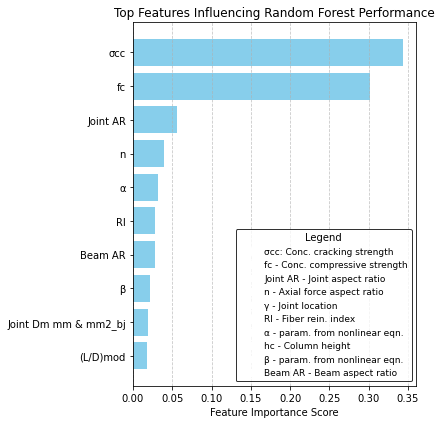

In [138]:
# Feature names 
feature_names = [
    "Location",
    "(Vf)tot",
    "(L/D)mod",
    "Rl",
    "fc",
    "σcc",
    "Beam AR",
    "Beam Dm.(mm)_h0 - as'",
    "hc",
    "Clmn Dm.(mm)_bc / hc",
    "Joint AR",
    "Joint Dm mm & mm2_bj",
    "n",
    "Joint stirrup_A0 (mm2)",
    "Joint stirrup_s (mm)",
    "Joint stirrup_fw (MPa)",
    "Joint stirrup_gross",
    "α",
    "β",
    "γ"
]

legends = [
    "σcc: Conc. cracking strength",
    "fc - Conc. compressive strength",
    "Joint AR - Joint aspect ratio",
    "n - Axial force aspect ratio",
    "γ - Joint location",
    "RI - Fiber rein. index",
    "α - param. from nonlinear eqn.",
    "hc - Column height",
    "β - param. from nonlinear eqn.",
    "Beam AR - Beam aspect ratio",
]

# Aggregate feature importances (average over different number of trees)
avg_feature_importances = np.mean(feature_importances, axis=0)


# Sort features by importance
sorted_indices = np.argsort(avg_feature_importances)[::-1]  # Descending order
sorted_features = [(feature_names[i], avg_feature_importances[i]) for i in sorted_indices]

# Print the top features
print("Features ranked by importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Plot the top 10 features by importance
top_n = 10  # Number of top features to display
top_features = sorted_features[:top_n]
features, importances = zip(*top_features)

plt.figure(figsize=(6, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Top Features Influencing Random Forest Performance")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for x-axis
plt.tight_layout()  # Adjust layout to fit everything nicely

# Create dummy handles for the legend box
patches = [mpatches.Patch(color='white', label=leg) for leg in legends]

# Add the legend box to the figure
plt.legend(
    handles=patches,
    loc='lower right',   # Place the legend inside the axes, in the lower-right corner
    frameon=True,
    edgecolor='black',
    title="Legend",
    fontsize=9
)
plt.savefig('../random_forest_results/feature_importance_analysis_case2.png', dpi=1000, bbox_inches='tight')

plt.show()


IndexError: list index out of range

In [ ]:
# # Train a new RandomForestRegressor with the optimal number of trees
# best_random_forest = RandomForestRegressor(n_estimators=optimal_trees, random_state=42)
# best_random_forest.fit(X_train_val, y_train_val)

# # Evaluate on the test set
# y_pred = best_random_forest.predict(X_test)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Test RMSE with {optimal_trees} trees:", test_rmse)